In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [3]:
epochs=10

In [4]:
train =pd.read_csv('DATA/sign_mnist_train.csv')
test=pd.read_csv('DATA/sign_mnist_test.csv')

In [5]:
#Datasets as numpy arrays
train_data=np.array(train,dtype='float32')
test_data=np.array(test,dtype='float32')

In [6]:
#Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Label for the image is: G


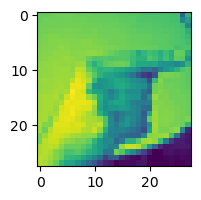

In [7]:
#Sanity check-plot a few images and labels
i=random.randint(1,train.shape[0])
fig1, ax1=plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)))
print("Label for the image is:",class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'Label')

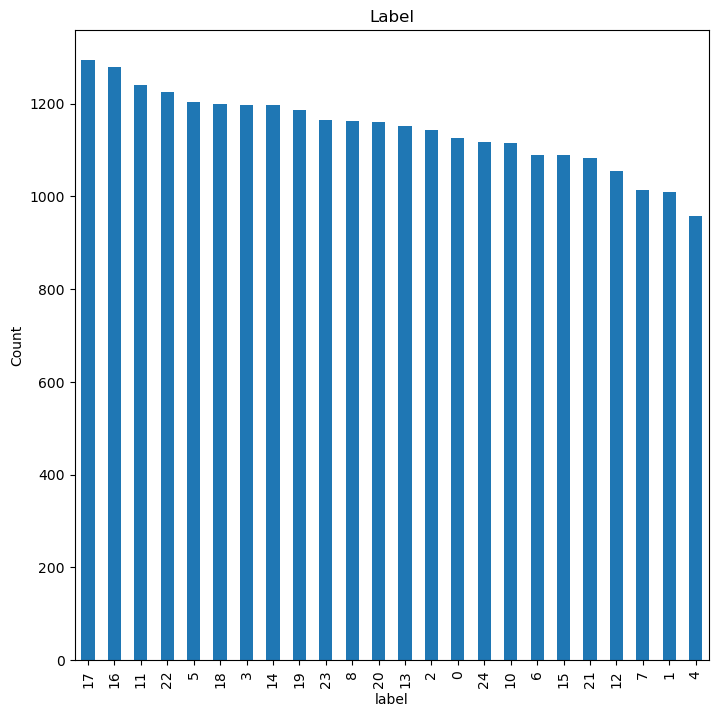

In [8]:
#Data distribuation visualization
fig= plt.figure(figsize=(18,18))
ax1= fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')


In [9]:
#Normalize/scale X values
X_train=train_data[:, 1:]/255
X_test=test_data[:, 1:]/255

In [10]:
#Convert y to categorical if planning on using categorical cross entropy
#No need to do this if using sparse categorical cross entropy

y_train=train_data[:,0]
y_train_cat=to_categorical(y_train,num_classes=25)

In [11]:
y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [12]:
#reshape for the neural network
X_train=X_train.reshape(X_train.shape[0], *(28,28,1))
X_test=X_test.reshape(X_test.shape[0], *(28,28,1))

In [13]:
#Model1

In [14]:
model1=Sequential()

In [15]:
model1.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

In [16]:
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))


In [17]:
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

In [18]:
model1.add(Flatten())

In [19]:
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(25, activation = 'softmax'))

In [20]:
#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy.

In [21]:
#model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [22]:
#Training the CNN model1
#history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history1 = model1.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 21s 90ms/step - loss: 2.6153 - acc: 0.1958 - val_loss: 1.5311 - val_acc: 0.5340
Epoch 2/10
215/215 [==============================] - 20s 92ms/step - loss: 1.1154 - acc: 0.6256 - val_loss: 0.7634 - val_acc: 0.7243
Epoch 3/10
215/215 [==============================] - 20s 92ms/step - loss: 0.6134 - acc: 0.7926 - val_loss: 0.5027 - val_acc: 0.8253
Epoch 4/10
215/215 [==============================] - 17s 80ms/step - loss: 0.3887 - acc: 0.8667 - val_loss: 0.3505 - val_acc: 0.8886
Epoch 5/10
215/215 [==============================] - 19s 89ms/step - loss: 0.2679 - acc: 0.9101 - val_loss: 0.3074 - val_acc: 0.8885
Epoch 6/10
215/215 [==============================] - 18s 86ms/step - loss: 0.1931 - acc: 0.9352 - val_loss: 0.2800 - val_acc: 0.8963
Epoch 7/10
215/215 [==============================] - 16s 76ms/step - loss: 0.1420 - acc: 0.9535 - val_loss: 0.2411 - val_acc: 0.9060
Epoch 8/10
215/215 [==============================] - 18s 84ms

In [23]:
model1.save('saved_models/model1.hdf5')

C:\Users\Jeevan Reddy\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
#Model2

In [25]:
model2 = Sequential()

In [26]:
model2.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

In [27]:
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

In [28]:
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(25, (1,1)))

In [29]:
model2.add(Flatten())

In [30]:
model2.add(Dense(25, activation = 'softmax'))

In [31]:
model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 64)          36928     
                                                      

In [32]:
history2 = model2.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))


Epoch 1/10
215/215 [==============================] - 43s 192ms/step - loss: 1.2975 - acc: 0.5961 - val_loss: 0.6480 - val_acc: 0.8155
Epoch 2/10
215/215 [==============================] - 39s 180ms/step - loss: 0.0867 - acc: 0.9728 - val_loss: 0.8111 - val_acc: 0.8296
Epoch 3/10
215/215 [==============================] - 40s 188ms/step - loss: 0.0191 - acc: 0.9944 - val_loss: 0.5823 - val_acc: 0.8841
Epoch 4/10
215/215 [==============================] - 39s 183ms/step - loss: 4.2709e-04 - acc: 1.0000 - val_loss: 0.6325 - val_acc: 0.8861
Epoch 5/10
215/215 [==============================] - 37s 173ms/step - loss: 2.1350e-04 - acc: 1.0000 - val_loss: 0.6588 - val_acc: 0.8897
Epoch 6/10
215/215 [==============================] - 40s 185ms/step - loss: 1.3280e-04 - acc: 1.0000 - val_loss: 0.6937 - val_acc: 0.8911
Epoch 7/10
215/215 [==============================] - 41s 189ms/step - loss: 9.1436e-05 - acc: 1.0000 - val_loss: 0.7185 - val_acc: 0.8910
Epoch 8/10
215/215 [===================

In [33]:
model2.save('saved_models/model2.hdf5')

In [34]:
###################################################################
#Model 3

In [35]:
model3 = Sequential()

In [36]:
model3.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

In [37]:
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

In [38]:
model3.add(Flatten())


In [39]:
model3.add(Dense(25, activation = 'softmax'))

In [40]:
model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

In [41]:
history3 = model3.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))


Epoch 1/10
215/215 [==============================] - 17s 74ms/step - loss: 1.7713 - acc: 0.4974 - val_loss: 0.8930 - val_acc: 0.7100
Epoch 2/10
215/215 [==============================] - 15s 72ms/step - loss: 0.4870 - acc: 0.8527 - val_loss: 0.4946 - val_acc: 0.8535
Epoch 3/10
215/215 [==============================] - 16s 72ms/step - loss: 0.2208 - acc: 0.9358 - val_loss: 0.3795 - val_acc: 0.8798
Epoch 4/10
215/215 [==============================] - 16s 73ms/step - loss: 0.1118 - acc: 0.9722 - val_loss: 0.3455 - val_acc: 0.9009
Epoch 5/10
215/215 [==============================] - 15s 71ms/step - loss: 0.0685 - acc: 0.9847 - val_loss: 0.3312 - val_acc: 0.9016
Epoch 6/10
215/215 [==============================] - 16s 73ms/step - loss: 0.0453 - acc: 0.9898 - val_loss: 0.3161 - val_acc: 0.9099
Epoch 7/10
215/215 [==============================] - 17s 78ms/step - loss: 0.0319 - acc: 0.9930 - val_loss: 0.3171 - val_acc: 0.9115
Epoch 8/10
215/215 [==============================] - 15s 72ms

In [42]:
model3.save('saved_models/model3.hdf5')

In [43]:
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########

In [44]:
from keras.models import load_model
from sklearn.metrics import accuracy_score

In [45]:
model1 = load_model('saved_models/model1.hdf5')
model2 = load_model('saved_models/model2.hdf5')
model3 = load_model('saved_models/model3.hdf5')

In [46]:
models = [model1, model2, model3]

In [47]:
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

225/225 [==============================] - 1s 6ms/step


In [48]:
# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

In [49]:
prediction1 = np.argmax(model1.predict(X_test), axis=-1)
prediction2 = np.argmax(model2.predict(X_test), axis=-1)
prediction3 = np.argmax(model3.predict(X_test), axis=-1)

225/225 [==============================] - 1s 5ms/step


In [50]:
prediction1

array([ 6,  5, 10, ..., 14,  4, 14], dtype=int64)

In [51]:
prediction2

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [52]:
prediction3

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [53]:
accuracy1 = accuracy_score(y_test, prediction1)
accuracy2 = accuracy_score(y_test, prediction2)
accuracy3 = accuracy_score(y_test, prediction3)
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

In [54]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.9297267150027886
Accuracy Score for model2 =  0.8915225878416062
Accuracy Score for model3 =  0.9217791411042945
Accuracy Score for average ensemble =  0.951617401003904


In [55]:
models = [model1, model2, model3]
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]


225/225 [==============================] - 1s 5ms/step


In [56]:
#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

In [57]:
weighted_accuracy = accuracy_score(y_test, weighted_ensemble_prediction)


In [58]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.9297267150027886
Accuracy Score for model2 =  0.8915225878416062
Accuracy Score for model3 =  0.9217791411042945
Accuracy Score for average ensemble =  0.951617401003904
Accuracy Score for weighted average ensemble =  0.9544060234244284


In [59]:
########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(X_test) for model in models]
preds1=np.array(preds1)

225/225 [==============================] - 1s 5ms/step


In [60]:
import pandas as pd
df = pd.DataFrame([])

In [61]:


for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(y_test, wted_ensemble_pred)
            df = df._append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)

In [62]:
max_acc_row = df.iloc[df['acc'].idxmax()]
print( " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2],"Max accuracy of ", max_acc_row[3],)         


 obained with w1= 0.3  w2= 0.2  and w3= 0.2 Max accuracy of  95.59397657557167


C:\Users\Jeevan Reddy\AppData\Local\Temp\ipykernel_10604\1171841704.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print( " obained with w1=", max_acc_row[0],
C:\Users\Jeevan Reddy\AppData\Local\Temp\ipykernel_10604\1171841704.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  " w2=", max_acc_row[1], " and w3=", max_acc_row[2],"Max accuracy of ", max_acc_row[3],)


In [63]:
###########################################################################
### Explore metrics for the ideal weighted ensemble model. 

models = [model1, model2, model3]
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(y_test, ideal_weighted_ensemble_prediction)


225/225 [==============================] - 1s 5ms/step


Predicted Label:  W
True Label:  W


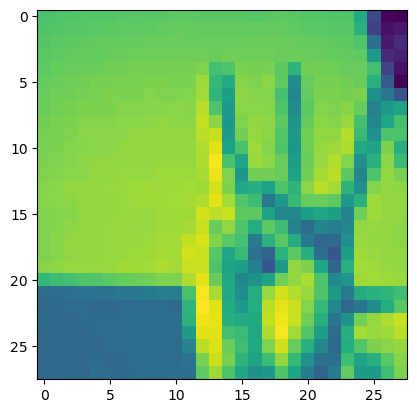

In [64]:
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_names[int(y_test[i])])


In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, ideal_weighted_ensemble_prediction)


<Axes: >

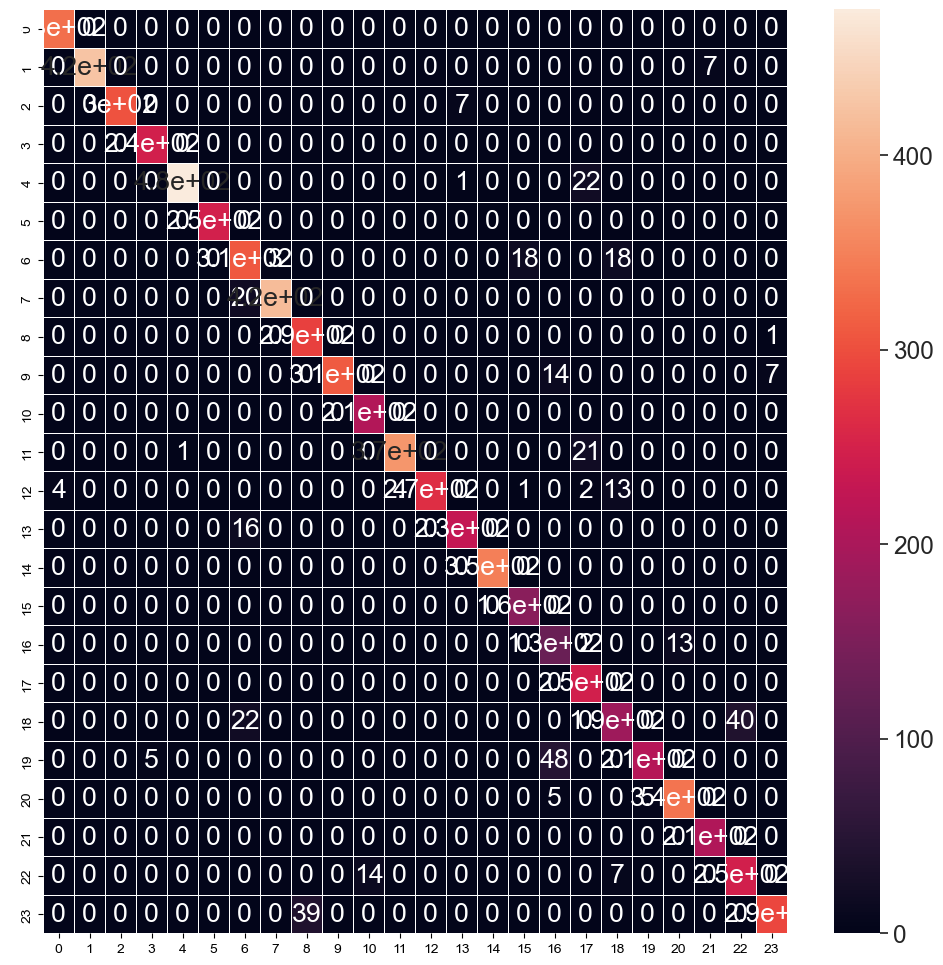

In [66]:
fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


([<matplotlib.axis.XTick at 0x26fe3f9f7d0>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H'),
  Text(8, 0, 'I'),
  Text(9, 0, 'J'),
  Text(10, 0, 'K'),
  Text(11, 0, 'L'),
  Text(12, 0, 'M'),
  Text(13, 0, 'N'),
  Text(14, 0, 'O'),
  Text(15, 0, 'P'),
  Text(16, 0, 'Q'),
  Text(17, 0, 'R'),
  Text(18, 0, 'S'),
  Text(19, 0, 'T'),
  Text(20, 0, 'U'),
  Text(21, 0, 'V'),
  Text(22, 0, 'W'),
  Text(23, 0, 'X'),
  Text(24, 0, 'Y')])

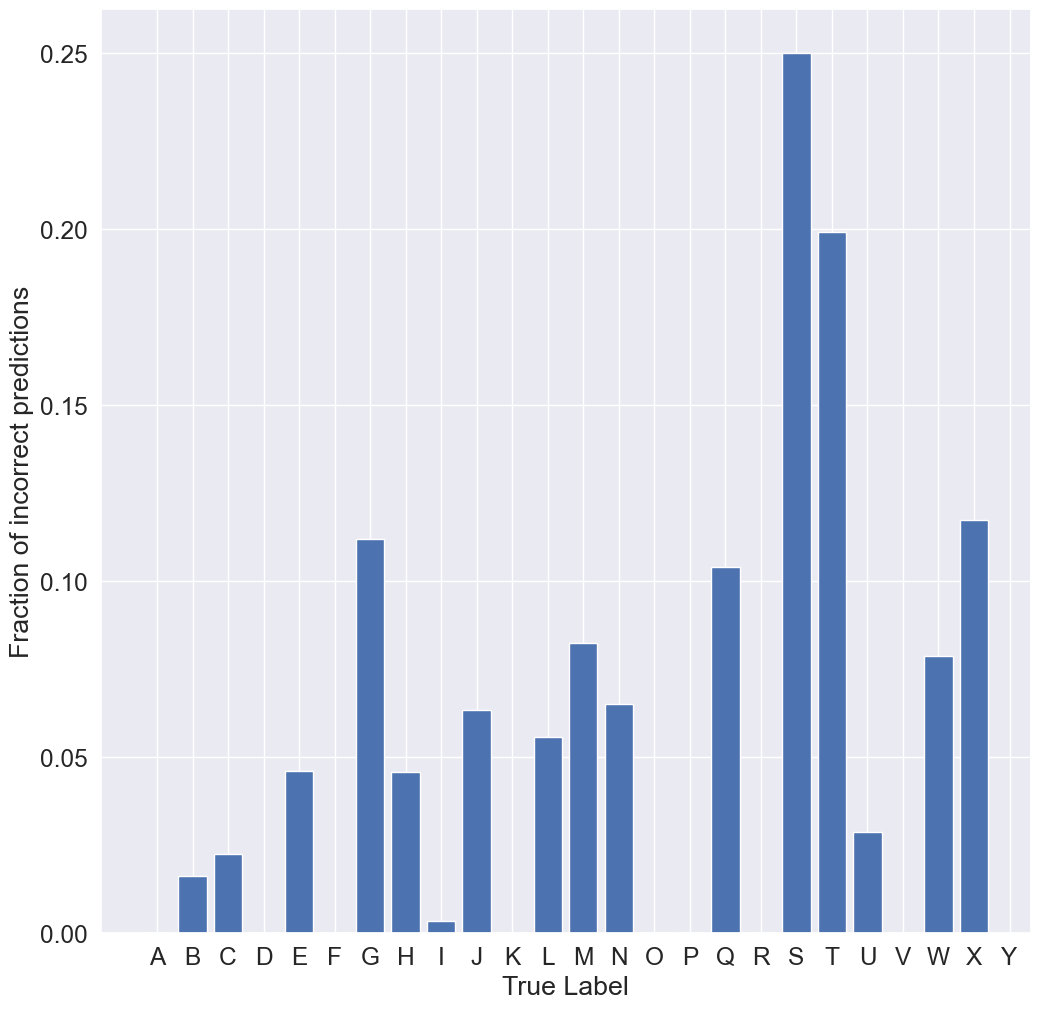

In [67]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(25), class_names) 